In [1]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00


In [2]:
import timm

In [3]:
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
from pathlib import Path

folder_path = Path('/content/drive/MyDrive/Colab Notebooks/crater_plain')


In [6]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.3, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

dls = dblock.dataloaders(folder_path)


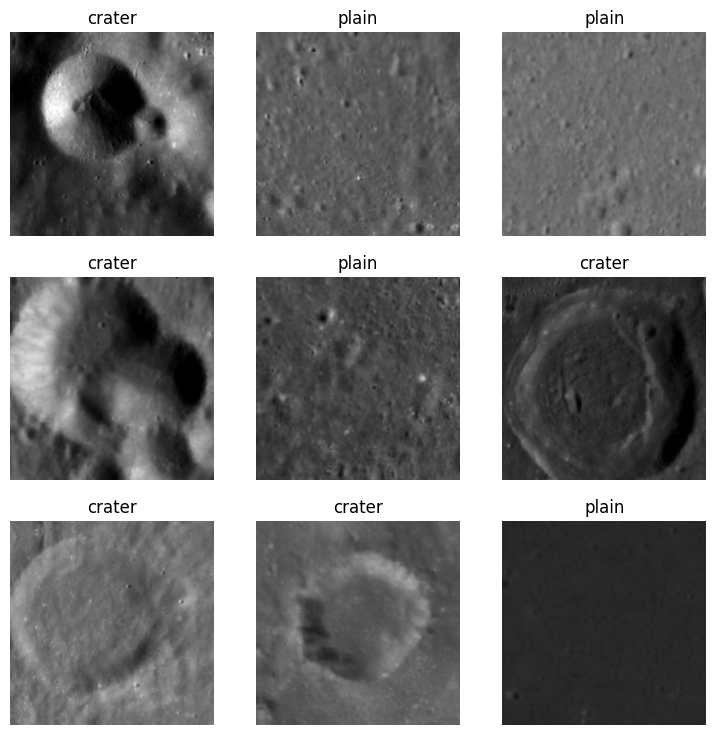

In [8]:
dls.show_batch()


In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 175MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.915585,1.417915,0.288889,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.065484,1.185559,0.288889,00:02
1,1.060085,1.009672,0.288889,00:02
2,0.860491,0.768214,0.288889,00:02
3,0.677394,0.518404,0.200000,00:03
4,0.567717,0.334880,0.111111,00:02


In [10]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
crater_or_plain, _, probs = learn.predict(img)

print(f"This is a: {crater_or_plain}")
print(f"Probability: {probs[0]:.4f}")

In [11]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [16]:
learn = vision_learner(dls, 'convnext_base', metrics=error_rate).to_fp16()
learn.fine_tune(10)

model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.137325,0.429739,0.133333,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.929587,0.418010,0.155556,00:03
1,1.016366,0.416235,0.155556,00:02
2,1.065909,0.421251,0.177778,00:02
3,1.000294,0.427840,0.177778,00:02
4,1.003569,0.051770,0.022222,00:03
5,0.842041,0.038192,0.022222,00:02
6,0.717972,0.016122,0.022222,00:02
7,0.621784,0.006187,0.000000,00:02
8,0.546984,0.001559,0.000000,00:03
9,0.487532,0.001176,0.000000,00:02


In [17]:
learn.export('model.pkl')

In [18]:
from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>